In [55]:
import pandas as pd
filename = 'galaxy_data.csv'
data = pd.read_csv(filename)
data = data.astype({'D': 'float'}).sort_values(by=['D'])
data = data.astype({'m-M': 'float'})
data.head(10)

,Galaxy Name,m-M,err,D,Method,REFCODE,GLON,GLAT,Type (RC3),Vgsr (RC3)
39,NGC 6822,23.31,0.03,0.459,Cepheids,2006ApJS..165..108S,25.4,-18.4,IBS9,44
42,NGC 6822,23.31,0.02,0.460,Cepheids,2006ApJ...647.1056G,25.4,-18.4,IBS9,44
0,"DDO 069, Leo A",24.47,0.10,0.783,Cepheids,2006MmSAI..77..299G,196.9,52.4,IB.9,-19
4,"M31, NGC 0224",24.54,0.07,0.809,Cepheids,2006ApJS.165..108S,121.2,-21.6,SAS3,-121
9,"M33, NGC 0598",24.64,0.06,0.847,Cepheids,2006ApJS..165..108S,133.6,-31.3,SAS6,-46
1,"DDO 216, Peg DIG",24.92,0.20,0.964,Cepheids,2006MmSAI..77..299G,94.8,-43.6,I..9,-20
41,NGC 3109,25.57,0.02,1.300,Cepheids,2006ApJ...648..375S,262.1,23.1,SBS9./,194
2,"GR8, UGC 08091",26.45,0.07,1.950,Cepheids,2006MmSAI..77..299G,310.7,77.0,I..9,183
17,NGC 0300,26.48,0.03,1.980,Cepheids,2006ApJS..165..108S,299.2,-79.4,SAS7,98
24,NGC 2403,27.43,0.15,3.060,Cepheids,2006ApJS..165..108S,150.6,29.2,SXS6,226


0.6371896503253109
61.584212466501846


Text(0.5, 1.0, 'Galaxy reccesional speed by distance')

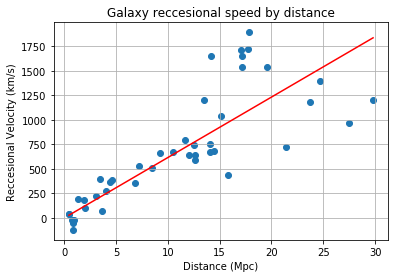

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = data.iloc[:, 3].values.reshape(-1, 1)
Y = data.iloc[:, 9].values.reshape(-1, 1)
lr = LinearRegression(fit_intercept=False)
lr.fit(X, Y)
fit_line = lr.predict(X)
print(lr.score(X,Y))
print(lr.coef_[0][0])
plt.scatter(X, Y)
plt.plot(X, fit_line, color='red')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Reccesional Velocity (km/s)')
plt.grid()
plt.title('Galaxy reccesional speed by distance')

Text(0.5, 1.0, 'Galaxy reccesional speed by distance')

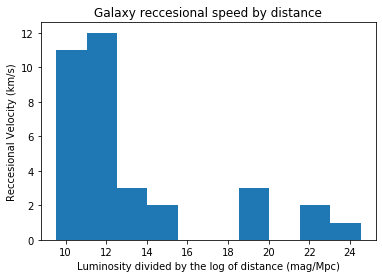

In [60]:
import numpy as np
data['Absolute luminosity'] = data['m-M'] / np.log(data['D'].astype('float'))
from scipy import stats
data = data[(np.abs((data['Absolute luminosity'] - data['Absolute luminosity'].mean()) / data['Absolute luminosity'].std()) < 3)]
plt.hist(data['Absolute luminosity'])
plt.xlabel('Luminosity divided by the log of distance (mag/Mpc)')
plt.ylabel('Reccesional Velocity (km/s)')
plt.title('Galaxy reccesional speed by distance')